# Advanced example of plot2d

Functions are defined in /scripts/python3/postel/plot2d.py

In [1]:
from os import environ, path
import matplotlib.pyplot as plt
import numpy as np
from data_manip.extraction.telemac_file import TelemacFile
from postel.plot2d import *

## Plot the 2d mesh with liquid boundaries numbering (same as the one in telemac)

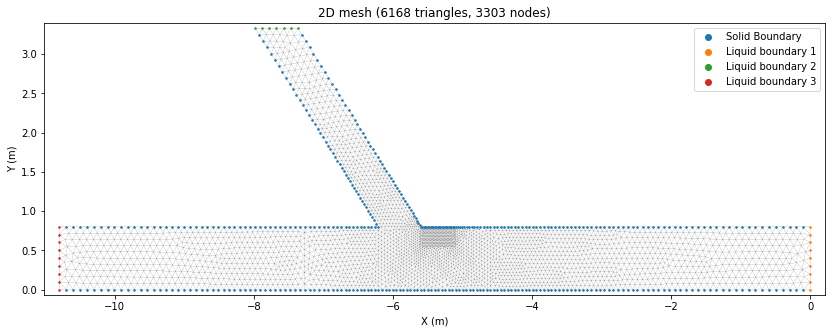

In [2]:
# File we are going to use
file_name = path.join(environ['HOMETEL'], 'examples', 'telemac2d', 'confluence', 'f2d_confluence.slf')
bnd_file = path.join(environ['HOMETEL'], 'examples', 'telemac2d', 'confluence', 'geo_confluence.cli')

# Initalisaing Telemac file reader
res = TelemacFile(file_name, bnd_file=bnd_file)

# Plot definition
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
  
# Get liquid boundary info
liq_bnd_info = res.get_liq_bnd_info()

# Plot mesh
plot2d_annotate_liq_bnd(ax, res.tri, liq_bnd_info, markersize=1.5, marker='o')
plot2d_triangle_mesh(ax, res.tri, x_label='X (m)', y_label='Y (m)', color='k', linewidth=0.1)

ax.set_title('2D mesh (%d triangles, %d nodes)' % (len(res.tri.triangles), len(res.tri.x)))
plt.show()
plt.close(fig)

## Plot the 2d mesh with boundary conditions

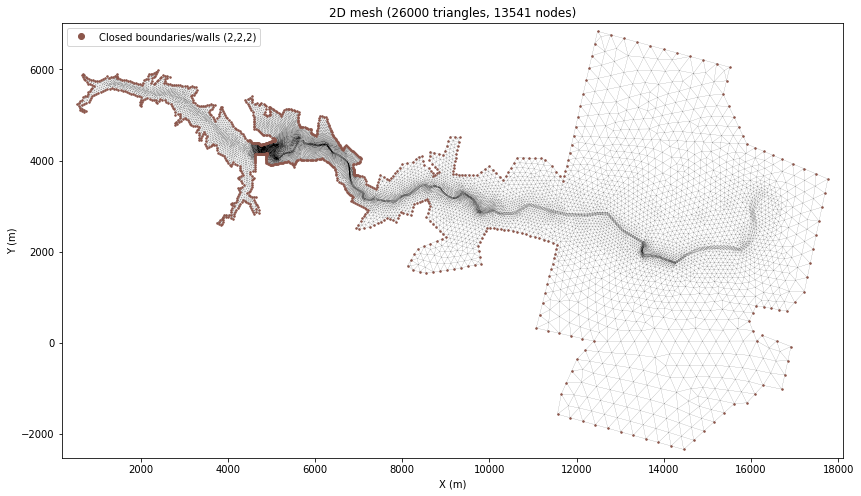

In [3]:
# File we are going to use
file_name = path.join(environ['HOMETEL'], 'examples', 'telemac2d', 'malpasset', 'f2d_malpasset-char.slf')
bnd_file = path.join(environ['HOMETEL'], 'examples', 'telemac2d', 'malpasset', 'geo_malpasset-small.cli')

# Initalisaing Telemac file 
res = TelemacFile(file_name, bnd_file=bnd_file)

# Getting values
H = res.get_data_value('WATER DEPTH', 0)
Ux = res.get_data_value('VELOCITY U', 0)
Uy = res.get_data_value('VELOCITY V', 0)

# Plot definition
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Get boundary condition type
bnd_info = res.get_bnd_info()

# Plot mesh
plot2d_annotate_bnd(ax, res.tri, bnd_info, markersize=1.5, marker='o')
plot2d_triangle_mesh(ax, res.tri, x_label='X (m)', y_label='Y (m)', color='k', linewidth=0.1)

ax.set_title('2D mesh (%d triangles, %d nodes)' % (len(res.tri.triangles), len(res.tri.x)))
plt.show()
plt.close(fig)

## Plot scalar map with masked dry zones

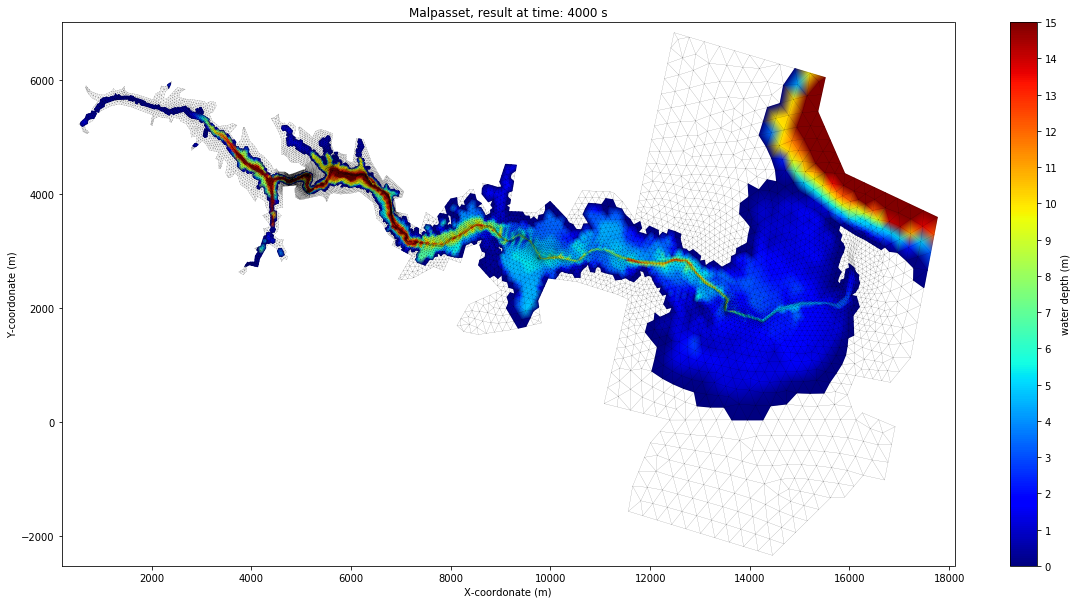

In [4]:
# Initialising matplotlib figure
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Plotting mesh
plot2d_triangle_mesh(ax, res.tri, color='k', linewidth=0.1)

# Define mask to hide dry zones in scalar 2d map
mask = mask_triangles(res.tri, H, relation='leq', threshold=0.01)
res.tri.set_mask(mask)

# Plotting scalar map
plot2d_scalar_map(fig, ax, res.tri, H, data_name='water depth (m)', vmin=0, vmax=15, nv=16)

# Defining labels
ax.set_title('Malpasset, result at time: %d s'%res.times[0])
ax.set_xlabel('X-coordonate (m)')
ax.set_ylabel('Y-coordonate (m)')

# Showing the plot
plt.show()
plt.close(fig)

del res

## Plot scalar map and streamlines with mesh overlay only in dry zones

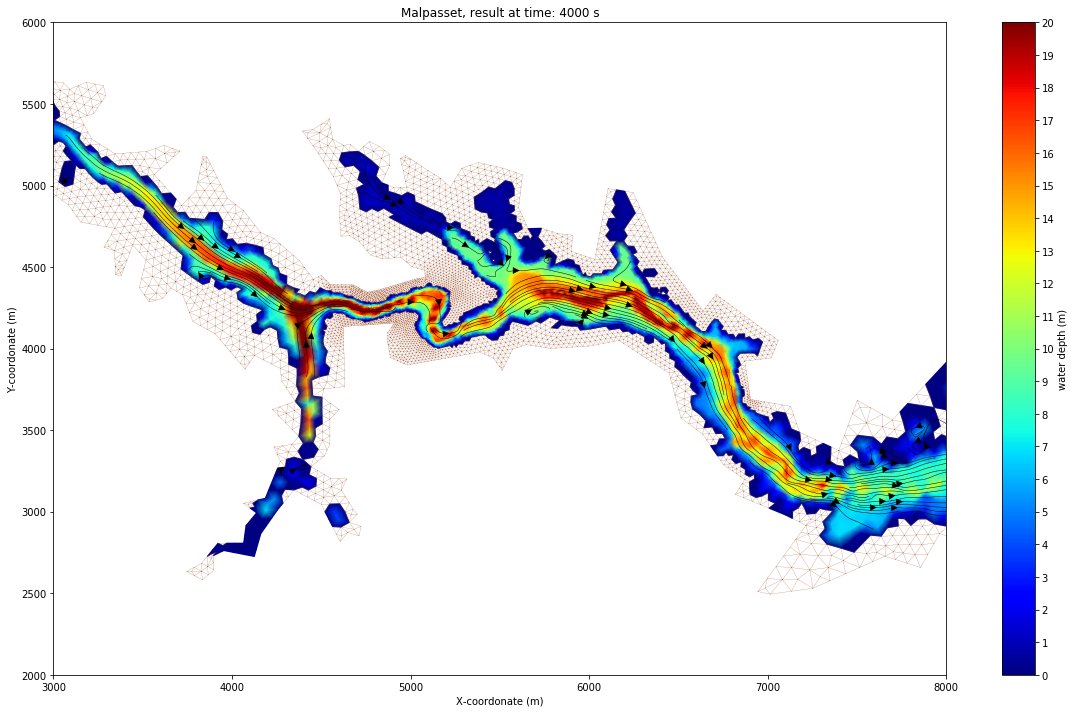

In [5]:
# Initalisaing Telemac file
res = TelemacFile(file_name, bnd_file=bnd_file)

# Initialising matplotlib figure
fig, ax = plt.subplots(1, 1, figsize=(20, 12))

# Define wet and dry zones mask
mask_wet = mask_triangles(res.tri, H, relation='geq', threshold=0.01)
mask_dry = mask_triangles(res.tri, H, relation='leq', threshold=0.01)

# Plotting mesh only on dry zones
res.tri.set_mask(mask_wet)
plot2d_triangle_mesh(ax, res.tri, color='sienna', linewidth=0.2)

# Plotting scalar map only on wet zones
res.tri.set_mask(mask_dry)
plot2d_scalar_map(fig, ax, res.tri, H, data_name='water depth (m)', vmin=0, vmax=20, nv=21)

# Setting x, y limits
xlim = [3000, 8000]
ylim = [2000, 6000]

# Plotting streamlines 
plot2d_streamlines(fig, ax, res.tri, Ux, Uy, 
                   grid_resolution=[100, 100],
                   grid_xlim=xlim, grid_ylim=ylim,
                   data_name='velocity streamlines', density=10, color='k')

# Defining plot limits
ax.set_xlim(xlim[0], xlim[1])
ax.set_ylim(ylim[0], ylim[1])

# Defining labels
ax.set_title('Malpasset, result at time: %d s'%res.times[0])
ax.set_xlabel('X-coordonate (m)')
ax.set_ylabel('Y-coordonate (m)')

# Showing the plot
plt.show()
plt.close(fig)

## Plot scalar map on triangulation and vectors on grid with mesh overlay only in dry zones

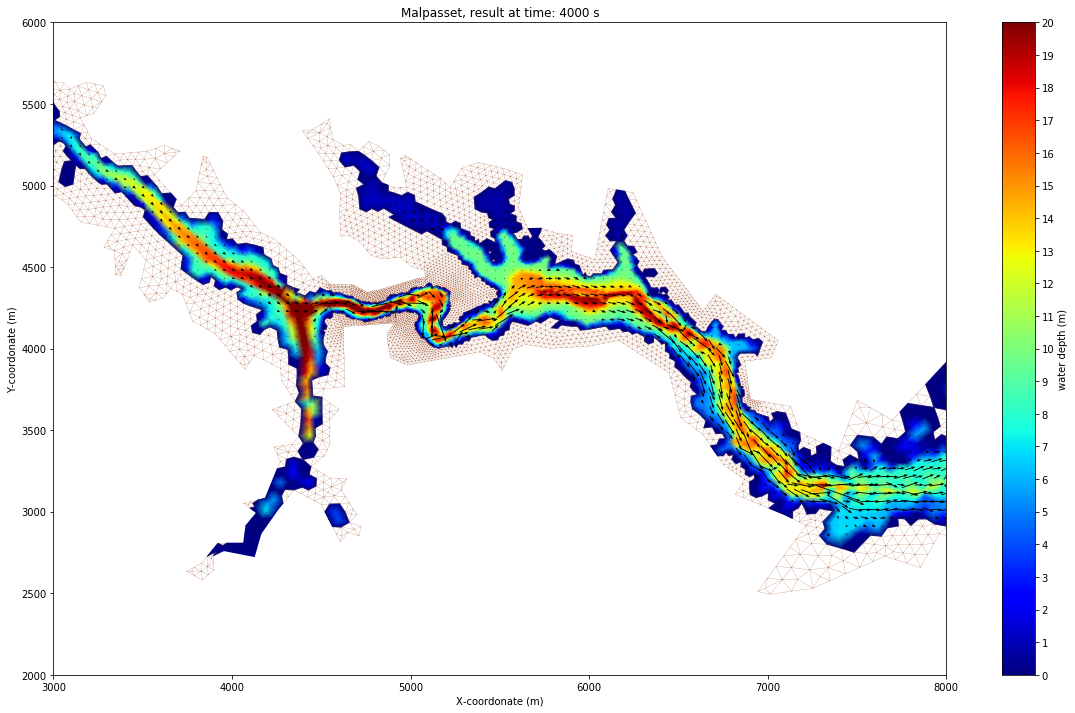

In [6]:
# Initialising matplotlib figure
fig, ax = plt.subplots(1, 1, figsize=(20, 12))

# Define wet and dry zones mask
mask_wet = mask_triangles(res.tri, H, relation='geq', threshold=0.01)
mask_dry = mask_triangles(res.tri, H, relation='leq', threshold=0.01)

# Plotting mesh only on dry zones
res.tri.set_mask(mask_wet)
plot2d_triangle_mesh(ax, res.tri, color='sienna', linewidth=0.2)

# Plotting scalar map only on wet zones
res.tri.set_mask(mask_dry)
plot2d_scalar_map(fig, ax, res.tri, H, data_name='water depth (m)', vmin=0, vmax=20, nv=21)

# Setting x, y limits
xlim = [3000, 8000]
ylim = [2000, 6000]

# Plotting vectors 
plot2d_vectors(fig, ax, res.tri, Ux, Uy, data_name='velocity',\
               normalize=False,
               scale=200,
               grid_resolution=[100, 80],
               grid_xlim=xlim, grid_ylim=ylim,
               color='k', pivot='mid',
               width=0.001, headwidth=3., headlength=4.)

# Defining plot limits
ax.set_xlim(xlim[0], xlim[1])
ax.set_ylim(ylim[0], ylim[1])

# Defining labels
ax.set_title('Malpasset, result at time: %d s'%res.times[0])
ax.set_xlabel('X-coordonate (m)')
ax.set_ylabel('Y-coordonate (m)')

# Showing the plot
plt.show()

## Rotate results

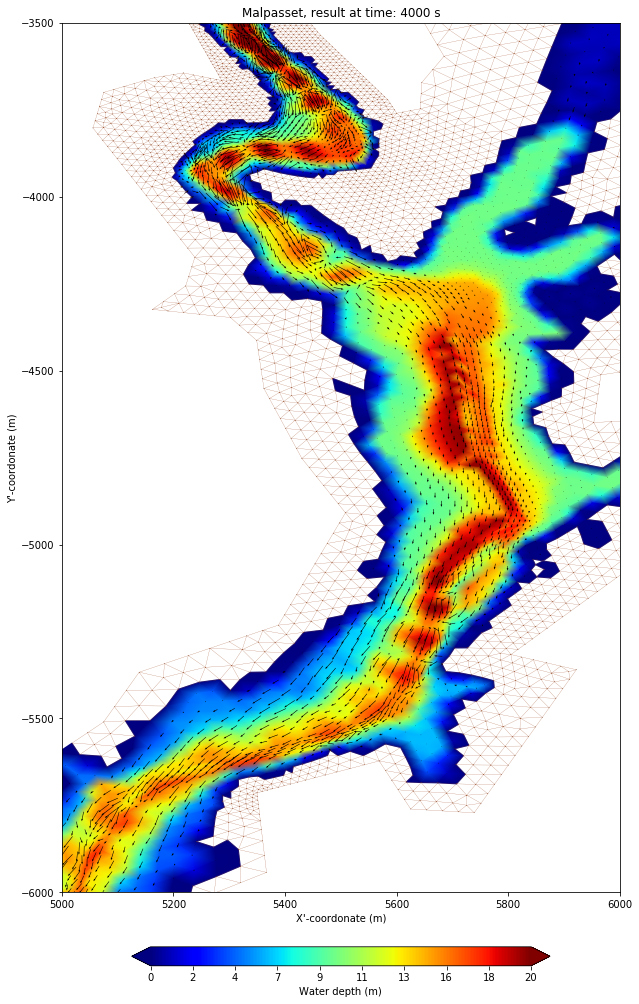

In [7]:
# Initialising matplotlib figure
fig, ax = plt.subplots(1, 1, figsize=(10, 20))

# Rotate mesh and vector field
res.tri.x, res.tri.y = rotate(res.tri.x, res.tri.y, angle=75)
Ux, Uy = rotate(Ux, Uy, angle=75)

# Define wet and dry zones mask
mask_wet = mask_triangles(res.tri, H, relation='geq', threshold=0.01)
mask_dry = mask_triangles(res.tri, H, relation='leq', threshold=0.01)

# Plotting mesh only on dry zones
res.tri.set_mask(mask_wet)
plot2d_triangle_mesh(ax, res.tri, color='sienna', linewidth=0.2)

# Plotting scalar map only on wet zones
res.tri.set_mask(mask_dry)
plot2d_scalar_map(fig, ax, res.tri, H, data_name='water depth (m)', vmin=0, vmax=20, nv=21, colorbar=False)

# Setting x, y limits and center of figure
xlim = [5000, 6000]
ylim = [-6000, -3500]

# Plotting vectors
plot2d_vectors(fig, ax, res.tri, Ux, Uy, data_name='velocity',\
               normalize=False,
               scale=200,
               color='k', pivot='mid',
               width=0.001, headwidth=3., headlength=4.)

# Defining plot limits
ax.set_xlim(xlim[0], xlim[1])
ax.set_ylim(ylim[0], ylim[1])

# Defining custom colorbar:
img = ax.collections[0]
v = np.linspace(0, 20, 10, endpoint=True)
cbar = fig.colorbar(img, ax=ax, ticks=v, format='%.0f',
                    fraction=0.15, aspect=20, shrink=.75, pad=0.05,
                    orientation='horizontal', extend='both')
cbar.set_label('Water depth (m)')

# Defining labels
ax.set_title('Malpasset, result at time: %d s'%res.times[0])
ax.set_xlabel("X'-coordonate (m)")
ax.set_ylabel("Y'-coordonate (m)")

# Showing the plot
plt.show()

# Closing file
del res